# Ejercicios Práctica Regresión 

Jessenia Piza Londoño - Carlos Sebastián Martínez Vidal - Manuela Acosta Fajardo

1. Cargue el dataset `Auto.csv`
  1. Use la librería de `statsmodels` (específicamente `import statsmodels.formula.api as smf` y luego `smf.ols`) para realizar una regresión lineal simple con *mpg* como la variable respuesta y *horsepower* como el predictor (o descriptor). Use el método `summary()` para mostrar los resultados. Comente lo siguiente sobre los resultados:

    1. ¿Existe una relación entre el predictor y la respuesta?
    2. ¿Qué tan fuerte es la relación entre el predictor y la respuesta?
    3. ¿La relación entre el predictor y la respuesta es positiva o negativa?
    4. ¿Cuál es el *mpg* previsto asociado con una *horsepower* de 98? ¿Cuáles son los intervalos de confianza y predicción del 95% asociados?

  2. Grafique la respuesta vs el predictor. Use `seaborn` y/o `matplotlib` para mostrar la línea de regresión de mínimos cuadrados.
  
Sugerencia: para evitar inconvenientes con los missing values que se encuentran como "?", lea de la siguiente forma el dataset:

```python
    auto = pd.read_csv("Data/Auto.csv", na_values='?')
```

In [40]:
# Importando todos los modulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline
# plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-white')

1. Cargue el dataset `Auto.csv`

In [41]:
auto = pd.read_csv("Data/Auto.csv", na_values='?')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


A. Use la librería de `statsmodels` (específicamente `import statsmodels.formula.api as smf` y luego `smf.ols`) para realizar una regresión lineal simple con *mpg* como la variable respuesta y *horsepower* como el predictor (o descriptor). Use el método `summary()` para mostrar los resultados. Comente lo siguiente sobre los resultados:

In [42]:
est = smf.ols('mpg ~ horsepower', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.9359,0.717,55.660,0.000,38.525,41.347
horsepower,-0.1578,0.006,-24.489,0.000,-0.171,-0.145


**a. ¿Existe una relación entre el predictor y la respuesta?**

Existe una relación inversamente proporcional entre la potencia y el rendimiento. Entre más potencia menos rendimiento.

**b. ¿Qué tan fuerte es la relación entre el predictor y la respuesta?**

Un aumento de "una unidad" en  la potencia del automóvil está asociado con una disminución de 0.1578 "unidades" en millas por galón.

**c. ¿La relación entre el predictor y la respuesta es positiva o negativa?**

Por los datos obtenidos anteriormente, podemos evidenciar que la relación entre el predictor y la respuesta es negativa.

**d. ¿Cuál es el mpg previsto asociado con una horsepower de 98? ¿Cuáles son los intervalos de confianza y predicción del 95% asociados?**

In [43]:
est.params[0] + est.params[1]*98

24.467077152512424

El mpg previsto asociado con una horsepower de 98 es 24.467077. El intervalo de confianza asociado al horsepower es [-0.171;	-0.145].


2. Reproduzca el análisis hecho en el notebook `Regresion-Lineal-Scikit-Learn.ipynb` para el dataset de boston completo. Para cargar el dataset (que viene por defecto en scikit-learn) ejecute:

 
 Tenga presente que los nombres de los predictores son diferentes al del ejemplo. Las variables están en proporciones (por ejm de 1000). Por ejemplo, la variable respuesta anteriormente se llamaba *Price*, ahora es *MEDV*.

In [44]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
print(boston.DESCR)

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Gráficas informativas

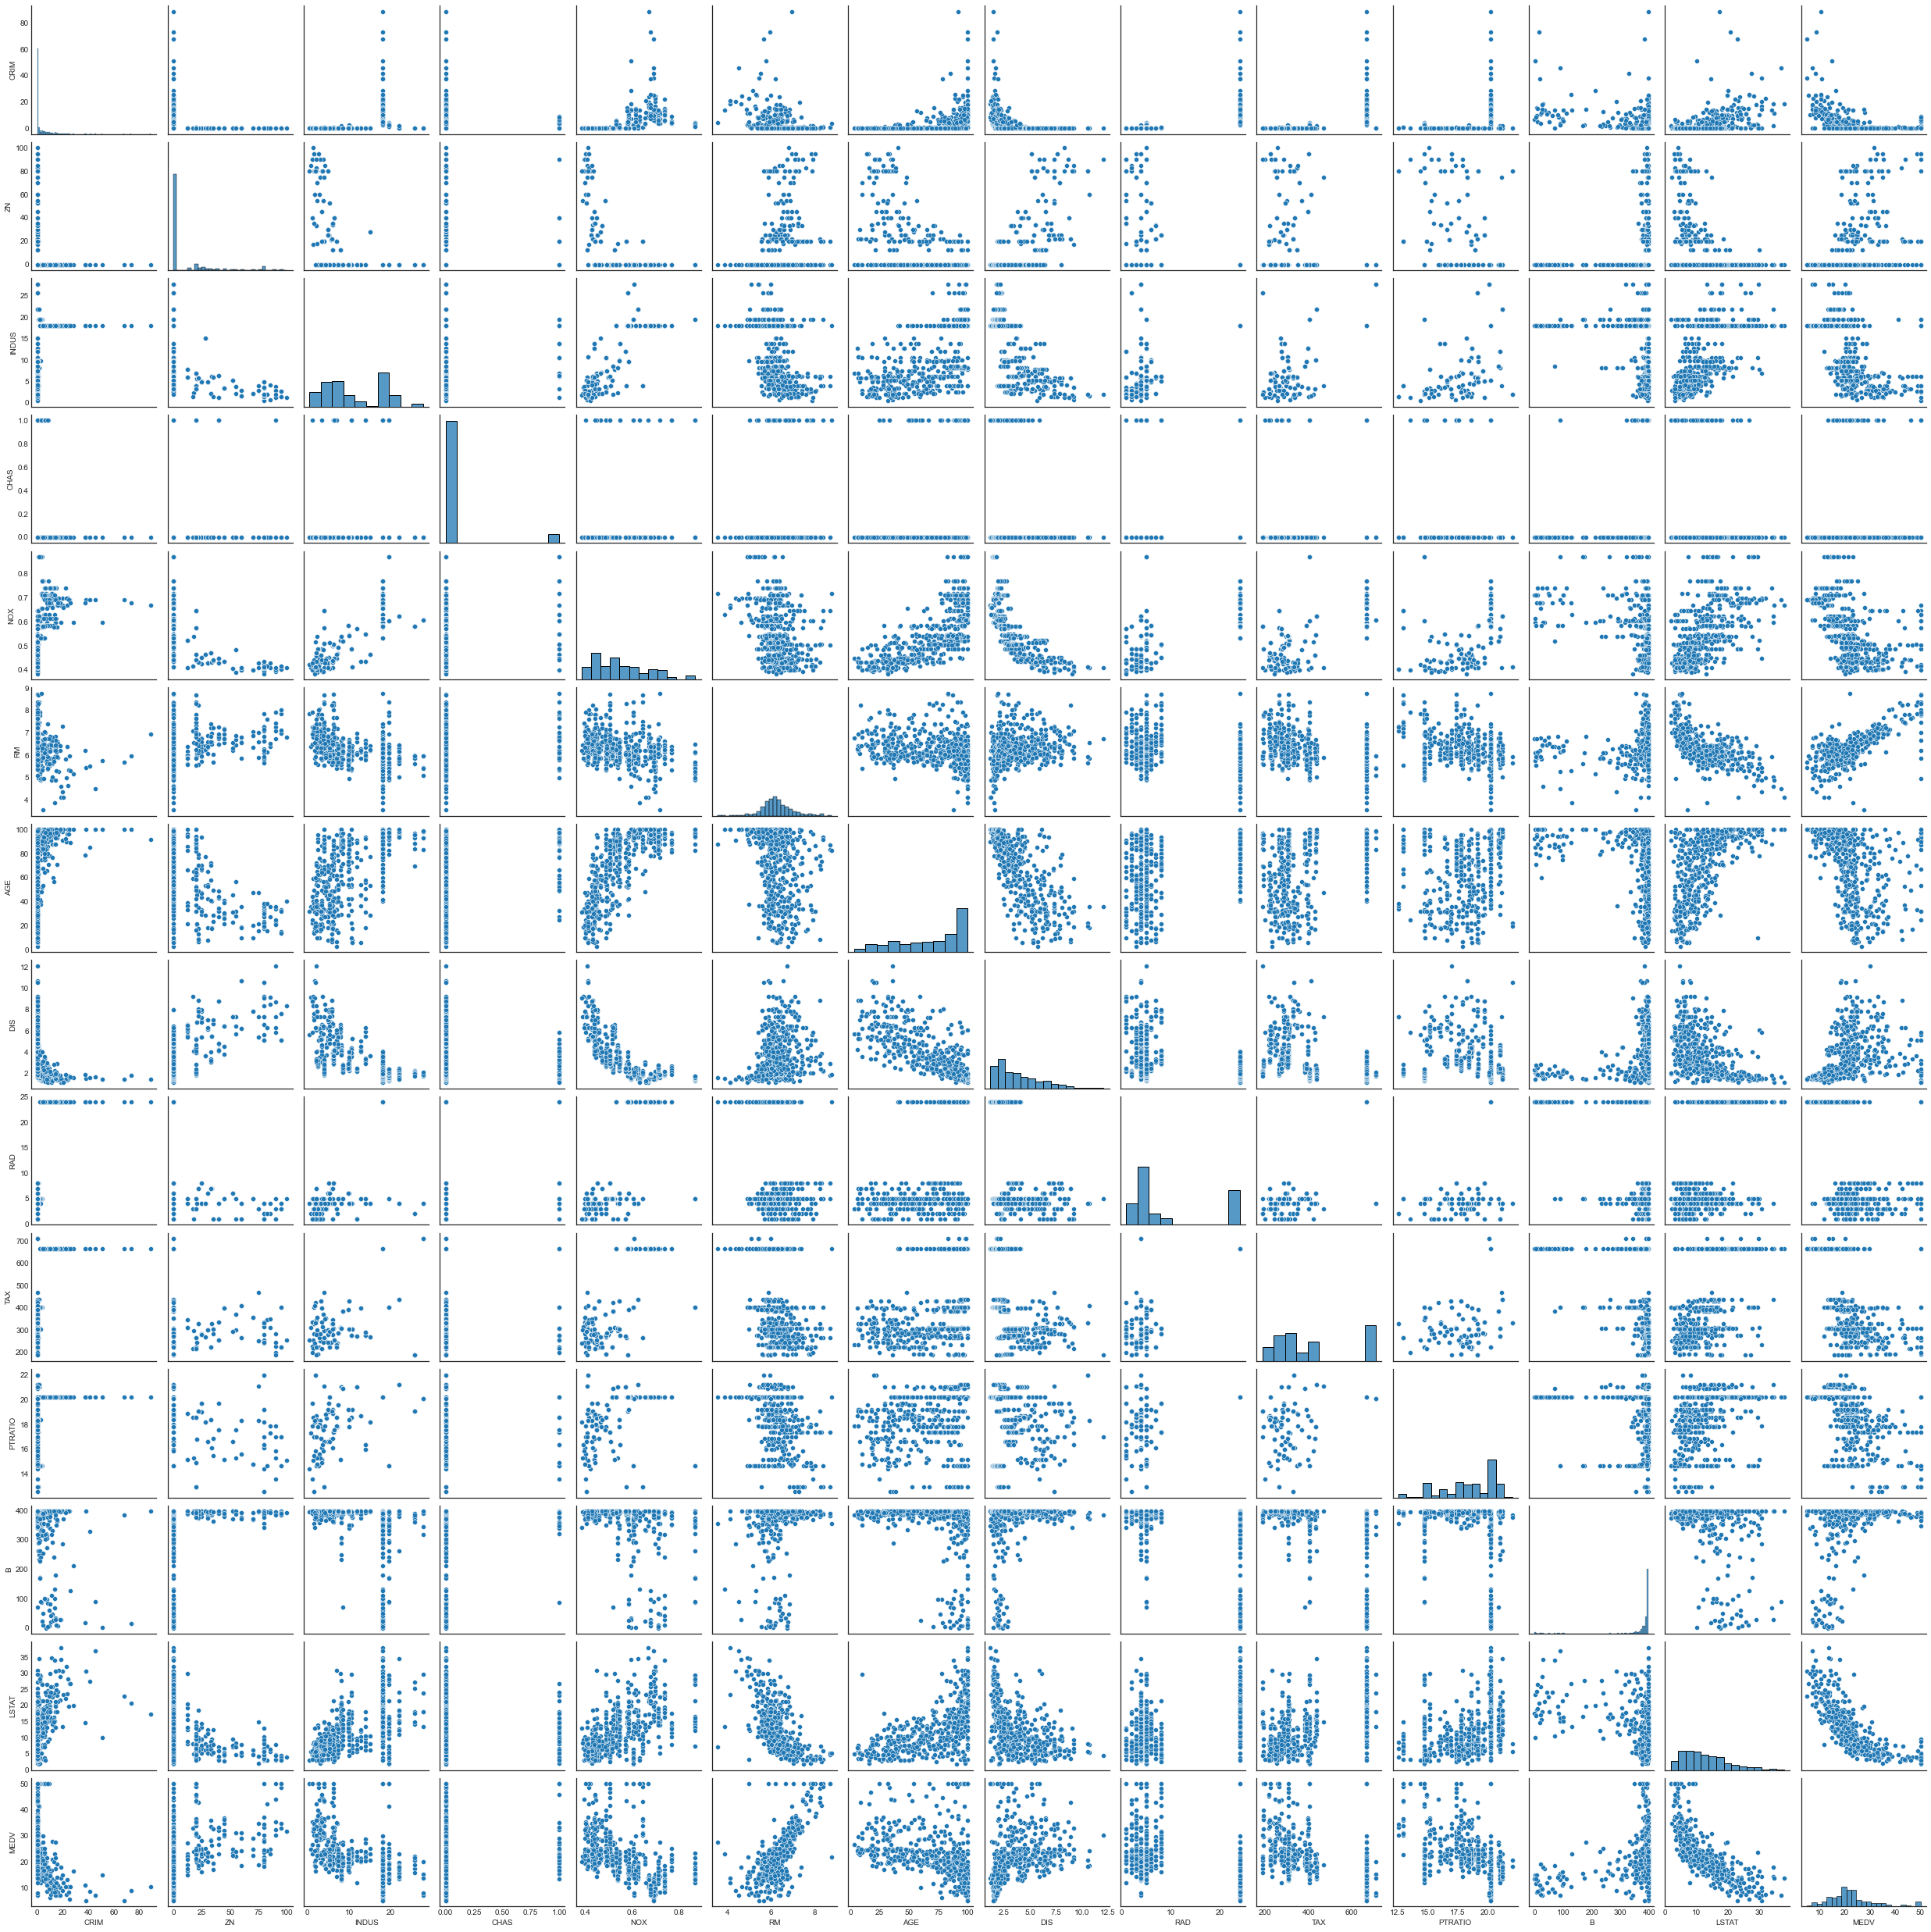

In [45]:
sns.pairplot(df)

c:\users\jesse\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

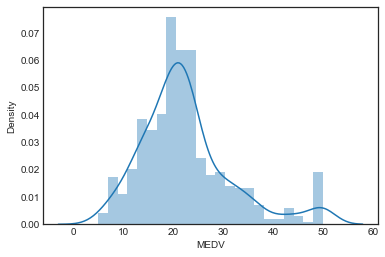

In [46]:
sns.distplot(df['MEDV'])

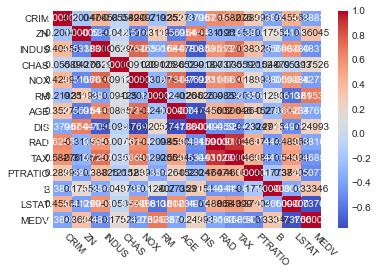

In [47]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, fmt="0.5f")
plt.xticks(rotation=-45, ha = 'left') 
plt.show()

## Entrenando un modelo de regresión lineal
### X e y

In [48]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creando y entrenando el modelo

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Evaluación del modelo

In [55]:
print(lm.intercept_)

41.28149654473768


In [56]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


Interpretando los coeficientes:

- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **CRIM** se asocia con un **disminución de \$0.07755**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **ZN** se asocia con un **incremento de \$0.042031**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **INDUS** se asocia con un **incremento de \$0.091153**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **CHAS** se asocia con un **incremento de \$4.133049**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **NOX** se asocia con un **disminución de \$19.976557**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **RM** se asocia con un **incremento de \$2.890190**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **AGE** se asocia con un **incremento de \$0.016153**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **DIS** se asocia con un **disminución de \$1.264747**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **RAD** se asocia con un **incremento de \$0.260171**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **TAX** se asocia con un **disminución de \$0.011125**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **PTRATIO** se asocia con un **disminución de \$0.011125**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **B** se asocia con un **incremento de \$0.007024**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **LSTAT** se asocia con un **disminución de \$0.643483**.

## Predicciones usando el modelo

In [57]:
predictions = lm.predict(X_test)

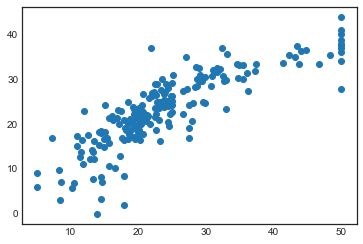

In [58]:
plt.scatter(y_test,predictions)

c:\users\jesse\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


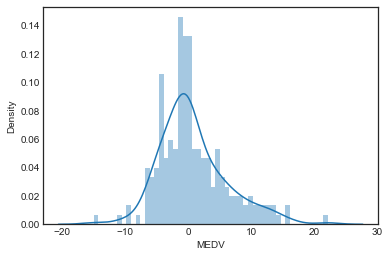

In [59]:
sns.distplot((y_test-predictions),bins=50);

## Evaluación

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
n = y_test.shape[0]

In [61]:
R2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test,predictions)
RSE = np.sqrt( MSE*n/(n-2) )

print("R^2 = {:1.3f}".format(R2) )
print("RSE = {:1.3f}".format(RSE))

R^2 = 0.700
RSE = 5.451


$3$. Este ejercicio involucra el uso de regresión lineal múltiple sobre el dataset `Auto` 


a. Grafique una matriz de dispersión que incluya todas las variables en el conjunto de datos.

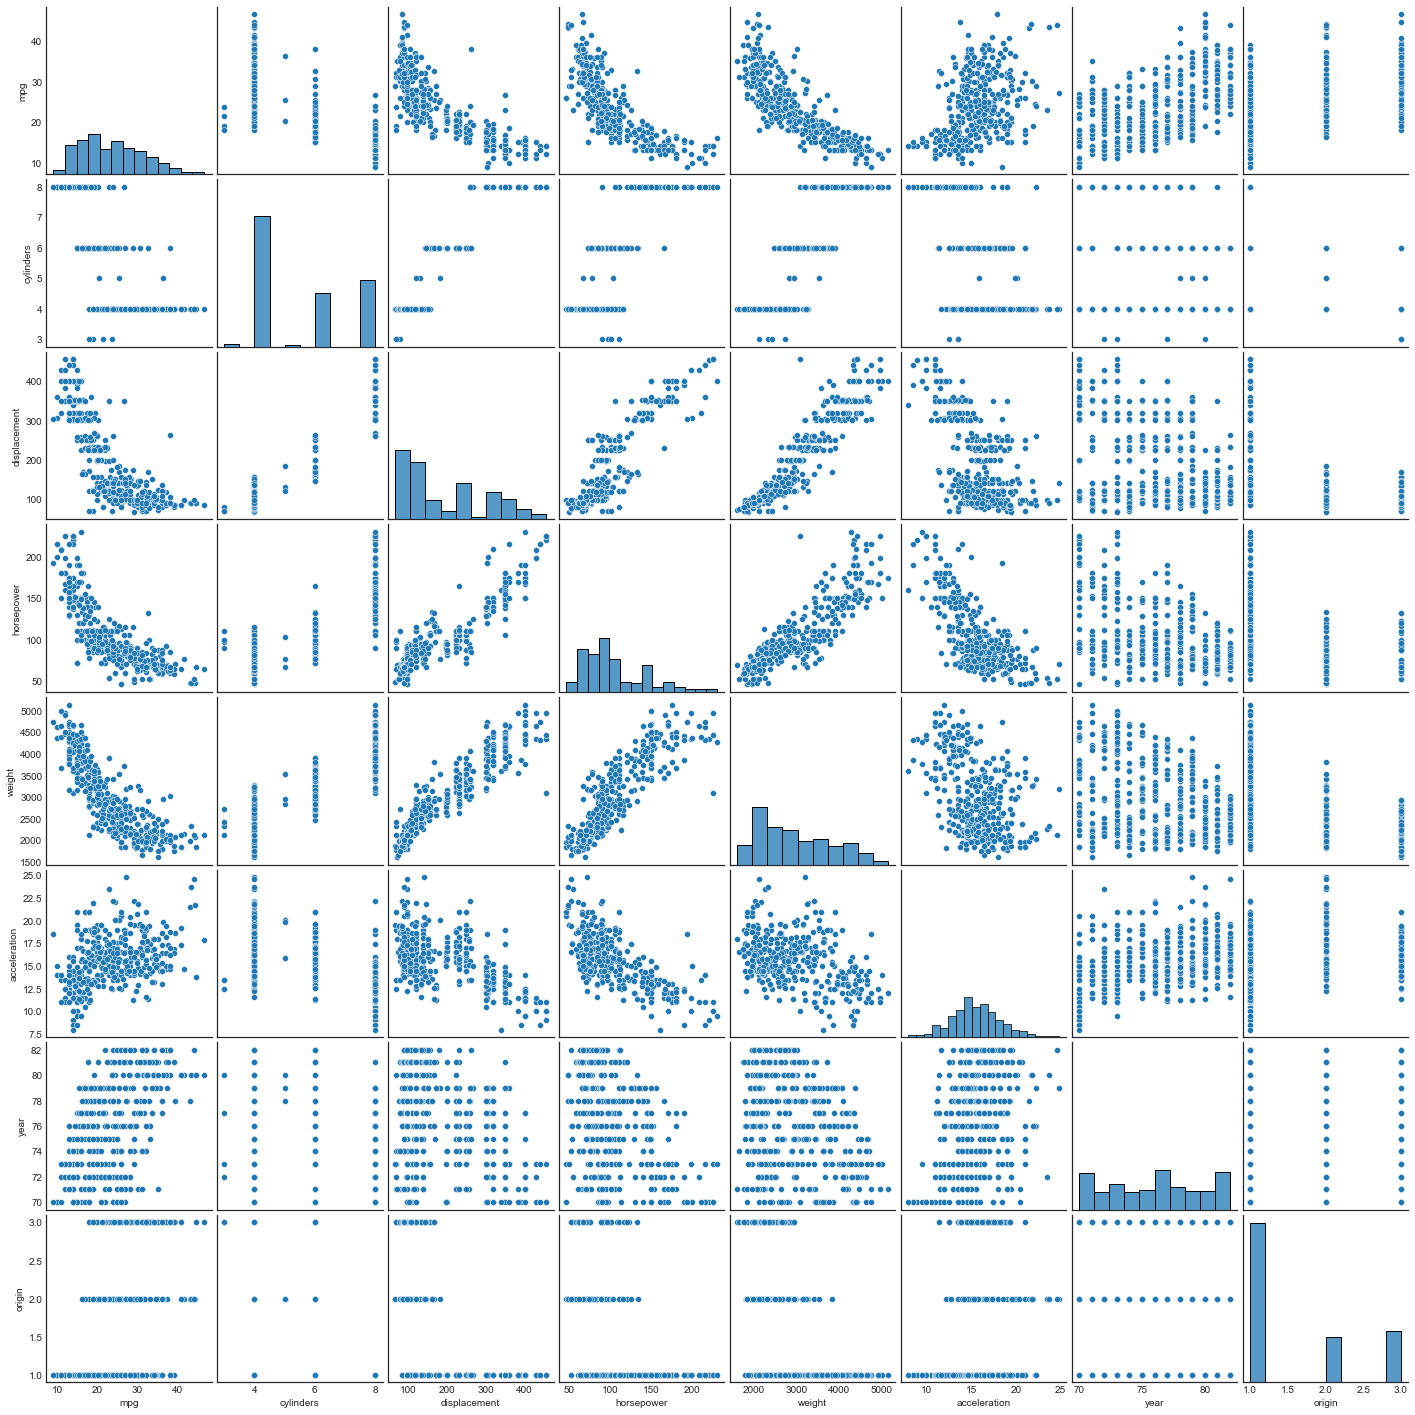

In [62]:
sns.pairplot(auto)

b. Calcule la matriz de correlaciones entre las variables usando el método `corr()` de Pandas. Luego grafiquela usando `seaborn`.

<AxesSubplot:>

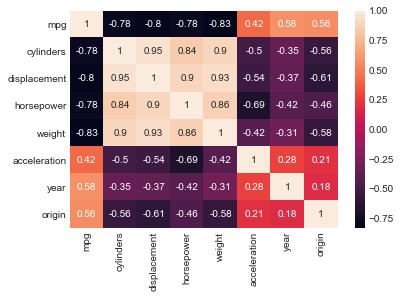

In [63]:
corr_matrix = auto.corr()
sns.heatmap(corr_matrix, annot = True)

 c. Use la librería de `statsmodels` (específicamente `import statsmodels.formula.api as smf` y luego `smf.ols`)  para realizar una regresión lineal múltiple con *mpg* como respuesta y todas las demás variables, excepto la variable `name`, como predictores. Use el método de summary() para imprimir los resultados. Comenta sobre el resultado:

In [64]:
est = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-17.2184,4.644,-3.707,0.000,-26.350,-8.087
cylinders,-0.4934,0.323,-1.526,0.128,-1.129,0.142
displacement,0.0199,0.008,2.647,0.008,0.005,0.035
horsepower,-0.0170,0.014,-1.230,0.220,-0.044,0.010
weight,-0.0065,0.001,-9.929,0.000,-0.008,-0.005
acceleration,0.0806,0.099,0.815,0.415,-0.114,0.275
year,0.7508,0.051,14.729,0.000,0.651,0.851
origin,1.4261,0.278,5.127,0.000,0.879,1.973


- **¿Existe una relación entre los predictores y la respuesta?**

Sí existen las relaciones entre los predictores y la respuesta. Podemos observar que la relación entre cylinders, horsepower, weight son inversamente proporcional a la respuesta. Por el contrario, displacement, acceleration, year, origin son directamente proporcional a la respuesta.

- **¿Qué predictores parecen tener una relación estadísticamente significativa con la respuesta?**

De acuerdo con los resultados obtenidos, podemos observar que los predictores que parecen tener una relación estadísticamente significativa con la respuesta son: cylinders, year y origin. Esto se debe a que son los predictores que tienen una mayor magnitud en sus coeficientes.

- **¿Qué sugiere el coeficiente para la variable del año?**

Sugiere que a medida que pasan los años, el consumo de mpg de los automóviles se incrementa. 

- **Use  multiplicaciones para ajustar  modelos de regresión lineal con efectos de interacción. ¿Alguna interacción parece ser estadísticamente significativa?.**

In [65]:
est2 = smf.ols('mpg ~ origin + year + origin*year', auto).fit()
est2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-81.6718,12.005,-6.803,0.000,-105.273,-58.070
origin,16.2851,6.853,2.376,0.018,2.811,29.759
year,1.2873,0.158,8.165,0.000,0.977,1.597
origin:year,-0.1521,0.089,-1.706,0.089,-0.327,0.023


In [66]:
est2 = smf.ols('mpg ~ cylinders + weight + cylinders*weight', auto).fit()
est2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,65.8060,3.719,17.695,0.000,58.494,73.118
cylinders,-4.2652,0.723,-5.902,0.000,-5.686,-2.844
weight,-0.0130,0.001,-9.574,0.000,-0.016,-0.010
cylinders:weight,0.0011,0.000,5.333,0.000,0.001,0.002


In [67]:
est3 = smf.ols('mpg ~ cylinders + year + cylinders*year', auto).fit()
est3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-61.8473,15.070,-4.104,0.000,-91.474,-32.220
cylinders,5.5488,2.741,2.025,0.044,0.161,10.937
year,1.3443,0.199,6.767,0.000,0.954,1.735
cylinders:year,-0.1141,0.037,-3.124,0.002,-0.186,-0.042


d.  Pruebe algunas transformaciones diferentes de las variables, como $\log{X}, \sqrt{X}, X^2$. Comente los hallazgos. Sug: se puede usar statmodels pero también scikit-learn con `sklearn.preprocessing.PolynomialFeatures` ( con los parámetros interaction_only=True,include_bias = False).

In [68]:
est_transf = smf.ols('mpg ~ np.sqrt(origin)', auto).fit()
est_transf.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.3188,1.358,3.915,0.000,2.648,7.989
np.sqrt(origin),14.9314,1.083,13.792,0.000,12.803,17.060


In [69]:
est_transf2 = smf.ols('mpg ~ np.log(origin)', auto).fit()
est_transf2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,20.1670,0.402,50.210,0.000,19.377,20.957
np.log(origin),9.8256,0.705,13.944,0.000,8.440,11.211


In [70]:
est_transf3 = smf.ols('mpg ~ np.power(origin,2)', auto).fit()
est_transf3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,19.2735,0.465,41.425,0.000,18.359,20.188
"np.power(origin, 2)",1.3593,0.105,12.923,0.000,1.153,1.566


Note que probando y analizando las transformaciones de la variable origin, podemos concluir que esta es más significativa en $\sqrt{X}$ con respecto a mpg.